In [24]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

data_set= pd.read_csv('Tumor Cancer Prediction_Data')
data_set





,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,diagnosis
0,1,0.008043,10.050,17.53,64.41,0.02100,0.10070,0.14020,0.07326,0.02511,0.01690,0.01775,0.014490,0.07664,0.1890,0.06331,384.0,0.2619,0.2894,0.14020,2.0150,1.778,16.85,0.007803,0.1055,0.002778,11.160,26.84,71.98,310.8,0.06499,B
1,2,0.010450,10.800,21.98,68.79,0.01844,0.08801,0.13030,0.05743,0.03614,0.02991,0.01404,0.021480,0.07662,0.2016,0.05977,489.5,0.3077,0.2965,0.16960,1.6210,2.240,20.20,0.006543,0.1927,0.002690,12.760,32.04,83.69,359.9,0.07485,B
2,3,0.008747,16.140,14.86,104.30,0.01500,0.09495,0.12060,0.08501,0.05500,0.01831,0.04528,0.012460,0.07012,0.1735,0.05875,947.9,0.2387,0.2778,0.17220,0.6372,1.729,21.83,0.003958,0.2310,0.001621,17.710,19.58,115.90,800.0,0.11290,B
3,4,0.015190,12.180,17.84,77.79,0.02220,0.10450,0.11400,0.07057,0.02490,0.01131,0.02941,0.011790,0.07376,0.1900,0.06635,495.2,0.3661,0.2227,0.09358,1.5110,2.410,24.44,0.005433,0.0498,0.003408,12.830,20.92,82.14,451.1,0.05882,B
4,5,0.004551,12.250,22.44,78.18,0.01608,0.08192,0.12560,0.05200,0.01714,0.00941,0.01261,0.012050,0.08203,0.1544,0.05976,622.9,0.2239,0.3100,0.18040,1.1390,1.577,18.04,0.005096,0.1230,0.002399,14.170,31.99,92.74,466.5,0.06335,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,451,0.014630,18.810,19.98,120.90,0.01930,0.08923,0.12430,0.05884,0.08020,0.02623,0.05843,0.011140,0.05737,0.1550,0.04996,1236.0,0.3283,0.2567,0.11600,0.8280,2.363,36.74,0.007571,0.2210,0.001676,19.960,24.30,129.00,1102.0,0.12940,M
451,452,0.014320,12.460,24.04,83.97,0.01789,0.11860,0.18530,0.23960,0.22730,0.07743,0.08543,0.072170,0.20750,0.2030,0.08243,711.4,0.2976,0.4366,1.05800,1.5990,2.039,23.94,0.007149,1.1050,0.010080,15.090,40.68,97.65,475.9,0.22100,M
452,453,0.006565,9.436,18.32,59.82,0.01942,0.10090,0.13330,0.05956,0.02710,0.02348,0.01406,0.008982,0.08136,0.1506,0.06959,439.6,0.5079,0.2454,0.10490,1.2470,3.267,30.48,0.006836,0.1144,0.002713,12.020,25.02,75.79,278.6,0.05052,B
453,454,0.000000,9.720,18.22,60.73,0.03799,0.06950,0.07117,0.02344,0.00000,0.00000,0.00000,0.006736,0.06559,0.1653,0.06447,303.8,0.3539,0.1909,0.02729,4.8850,2.230,21.69,0.001713,0.0000,0.001688,9.968,20.83,62.25,288.1,0.00000,B


In [25]:
df = pd.DataFrame(data_set)
filtered_data=pd.get_dummies(data=df,drop_first=True)
filtered_data.drop_duplicates()
filtered_data



,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,diagnosis_M
0,1,0.008043,10.050,17.53,64.41,0.02100,0.10070,0.14020,0.07326,0.02511,0.01690,0.01775,0.014490,0.07664,0.1890,0.06331,384.0,0.2619,0.2894,0.14020,2.0150,1.778,16.85,0.007803,0.1055,0.002778,11.160,26.84,71.98,310.8,0.06499,0
1,2,0.010450,10.800,21.98,68.79,0.01844,0.08801,0.13030,0.05743,0.03614,0.02991,0.01404,0.021480,0.07662,0.2016,0.05977,489.5,0.3077,0.2965,0.16960,1.6210,2.240,20.20,0.006543,0.1927,0.002690,12.760,32.04,83.69,359.9,0.07485,0
2,3,0.008747,16.140,14.86,104.30,0.01500,0.09495,0.12060,0.08501,0.05500,0.01831,0.04528,0.012460,0.07012,0.1735,0.05875,947.9,0.2387,0.2778,0.17220,0.6372,1.729,21.83,0.003958,0.2310,0.001621,17.710,19.58,115.90,800.0,0.11290,0
3,4,0.015190,12.180,17.84,77.79,0.02220,0.10450,0.11400,0.07057,0.02490,0.01131,0.02941,0.011790,0.07376,0.1900,0.06635,495.2,0.3661,0.2227,0.09358,1.5110,2.410,24.44,0.005433,0.0498,0.003408,12.830,20.92,82.14,451.1,0.05882,0
4,5,0.004551,12.250,22.44,78.18,0.01608,0.08192,0.12560,0.05200,0.01714,0.00941,0.01261,0.012050,0.08203,0.1544,0.05976,622.9,0.2239,0.3100,0.18040,1.1390,1.577,18.04,0.005096,0.1230,0.002399,14.170,31.99,92.74,466.5,0.06335,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,451,0.014630,18.810,19.98,120.90,0.01930,0.08923,0.12430,0.05884,0.08020,0.02623,0.05843,0.011140,0.05737,0.1550,0.04996,1236.0,0.3283,0.2567,0.11600,0.8280,2.363,36.74,0.007571,0.2210,0.001676,19.960,24.30,129.00,1102.0,0.12940,1
451,452,0.014320,12.460,24.04,83.97,0.01789,0.11860,0.18530,0.23960,0.22730,0.07743,0.08543,0.072170,0.20750,0.2030,0.08243,711.4,0.2976,0.4366,1.05800,1.5990,2.039,23.94,0.007149,1.1050,0.010080,15.090,40.68,97.65,475.9,0.22100,1
452,453,0.006565,9.436,18.32,59.82,0.01942,0.10090,0.13330,0.05956,0.02710,0.02348,0.01406,0.008982,0.08136,0.1506,0.06959,439.6,0.5079,0.2454,0.10490,1.2470,3.267,30.48,0.006836,0.1144,0.002713,12.020,25.02,75.79,278.6,0.05052,0
453,454,0.000000,9.720,18.22,60.73,0.03799,0.06950,0.07117,0.02344,0.00000,0.00000,0.00000,0.006736,0.06559,0.1653,0.06447,303.8,0.3539,0.1909,0.02729,4.8850,2.230,21.69,0.001713,0.0000,0.001688,9.968,20.83,62.25,288.1,0.00000,0


In [26]:
x=filtered_data.drop('diagnosis_M',axis=1)
y=filtered_data['diagnosis_M']
x
x_scaled=MinMaxScaler().fit_transform(x)

In [27]:
x=x_scaled
x_scaled


array([[0.        , 0.1523584 , 0.1452506 , ..., 0.10742567, 0.07096501,
        0.22387186],
       [0.00220264, 0.19795416, 0.18074684, ..., 0.16574531, 0.09179215,
        0.25783672],
       [0.00440529, 0.16569426, 0.43348005, ..., 0.32616166, 0.27847296,
        0.38890803],
       ...,
       [0.99559471, 0.12436067, 0.11619102, ..., 0.12640072, 0.05730647,
        0.17402687],
       [0.99779736, 0.        , 0.12963226, ..., 0.05896708, 0.06133616,
        0.        ],
       [1.        , 0.24000758, 0.21434995, ..., 0.15872304, 0.11028632,
        0.33251808]])

In [28]:
y

0      0
1      0
2      0
3      0
4      0
      ..
450    1
451    1
452    0
453    0
454    0
Name: diagnosis_M, Length: 455, dtype: uint8

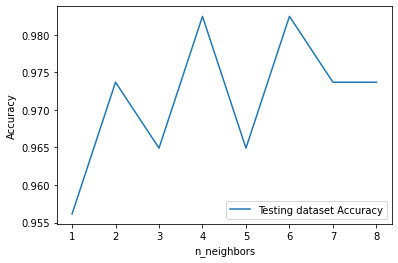

In [29]:
X_train1,X_test1,y_train1,y_test1= train_test_split(x,y,test_size=114/455,random_state=300)
model1=svm.SVC(kernel='linear')
model1.fit(X_train1,y_train1)
y_pred1 = model1.predict(X_test1)

X_train2,X_test2,y_train2,y_test2= train_test_split(x,y,test_size=114/455,random_state=300)
model2=LogisticRegression()
model2.fit(X_train2,y_train2)
y_pred2=model2.predict(X_test2)

X_train3,X_test3,y_train3,y_test3= train_test_split(x,y,test_size=114/455,random_state=300)
model3=DecisionTreeClassifier()
model3.fit(X_train3,y_train3)
y_pred3=model3.predict(X_test3)


#bonus model 1 
X_train4,X_test4,y_train4,y_test4= train_test_split(x,y,test_size=114/455,random_state=300)
model4 = GaussianNB() # create a classifier
model4.fit(X_train4,y_train4) # fitting the data
y_pred4 = model4.predict(X_test4) # store the prediction data


#bonus model2
X_train5,X_test5,y_train5,y_test5= train_test_split(x,y,test_size=114/455,random_state=300)
model5 = KNeighborsClassifier(n_neighbors=4)
model5.fit(X_train5, y_train5)
y_pred5 = model5.predict(X_test5) # store the prediction data

neighbors = np.arange(1, 9)
#train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    model5 = KNeighborsClassifier(n_neighbors=k)
    model5.fit(X_train5, y_train5)
     
    # Compute test data accuracy
    test_accuracy[i] = model5.score(X_test5,y_test5)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')

 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()


In [30]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("SVM Accuracy:",metrics.accuracy_score(y_test1, y_pred1))
print("Logistic Accuracy:",metrics.accuracy_score(y_test2, y_pred2))
print("Decision Tree Accuracy:",metrics.accuracy_score(y_test3, y_pred3))
print("Naive Bayes Accuracy:",metrics.accuracy_score(y_test4, y_pred4))
print("KNN Accuracy:",metrics.accuracy_score(y_test5, y_pred5))



SVM Accuracy: 0.9912280701754386
Logistic Accuracy: 0.9824561403508771
Decision Tree Accuracy: 0.9298245614035088
Naive Bayes Accuracy: 0.9649122807017544
KNN Accuracy: 0.9824561403508771


In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print("SVM confusion matrix : ")
print(confusion_matrix(y_test1,y_pred1))

print("SVM classification report :")
print(classification_report(y_test1,y_pred1))




SVM confusion matrix : 
[[78  0]
 [ 1 35]]
SVM classification report :
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        78
           1       1.00      0.97      0.99        36

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [32]:
print("Logistic confusion matrix : ")
print(confusion_matrix(y_test2,y_pred2))

print("Logistic classification report :")
print(classification_report(y_test2,y_pred2))



Logistic confusion matrix : 
[[77  1]
 [ 1 35]]
Logistic classification report :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        78
           1       0.97      0.97      0.97        36

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [33]:
print("Decision tree confusion matrix : ")
print(confusion_matrix(y_test3,y_pred3))

print("Decision tree classification report :")
print(classification_report(y_test3,y_pred3))


Decision tree confusion matrix : 
[[73  5]
 [ 3 33]]
Decision tree classification report :
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        78
           1       0.87      0.92      0.89        36

    accuracy                           0.93       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



In [34]:
print("Naive Bayes confusion matrix : ")
print(confusion_matrix(y_test4,y_pred4))

print("Naive Bayes classification report :")
print(classification_report(y_test4,y_pred4))

Naive Bayes confusion matrix : 
[[76  2]
 [ 2 34]]
Naive Bayes classification report :
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        78
           1       0.94      0.94      0.94        36

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

